In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from IPython.display import Image

In [3]:
def load_dataset(results):
    df = pd.read_csv(results, usecols=['timeStamp','elapsed','success','bytes','Latency', 'IdleTime','Connect'])
    df['totalElapsed'] = df.elapsed.cumsum()
    df['throughput'] = ((df.index+1)/(df.totalElapsed/(df.index+1))*60000)
    return df

In [4]:
def load_summary(summary, label):
    df = pd.read_csv(summary)
    df.insert(0, "Function", label)
    df.drop(columns=["Average","Min","Max", "# Samples"], inplace=True)
    return df

In [5]:
dir1= "NearVotingJMeterTests3/"
dir2= "NearVotingJMeterTests4/"

In [6]:
add = load_dataset(dir1+'Add/Add_1000T.csv')
add_sum = load_summary(dir1+'Add/Add_1000T_Sum.csv',"add")

In [15]:
add_vector_compressed = load_dataset(dir1+'Add/Add_1000t_Compressed.csv')

In [16]:
vote = load_dataset(dir1+'Vote/Vote_1000T.csv')
vote_sum = load_summary(dir1+'Vote/Vote_1000T_Sum.csv', "vote")

In [17]:
get = load_dataset(dir1+'Get/Get_1000T_250.csv')
get_sum = load_summary(dir1+'Get/Get_1000T_250_Sum.csv',"get")

In [18]:
get_vector_compressed = load_dataset(dir1+'Get/Get_1000T_250_Decompressed.csv')

In [11]:
add_v2 = load_dataset(dir2+'Add/Add_1000T.csv')
add_sum_v2 = load_summary(dir2+'Add/Add_1000T_sum.csv',"add")

add_compressed_v2 = load_dataset(dir2+'Add/Add_1KT_compressed.csv')
add_compressed_sum_v2 = load_summary(dir2+'Add/Add_1KT_compressed_sum.csv',"add")

In [12]:
vote_v2 = load_dataset(dir2+'Vote/Vote_1000T.csv')
vote_sum_v2 = load_summary(dir2+'Vote/Vote_1000T_sum.csv', "vote")

vote_compressed_v2 = load_dataset(dir2+'Vote/Vote_1KT_compressed.csv')
vote_compressed_sum_v2 = load_summary(dir2+'Vote/Vote_1KT_compressed_sum.csv', "vote")

In [13]:
get_v2 = load_dataset(dir2+'Get/Get_1KT.csv')
get_sum_v2 = load_summary(dir2+'Get/Get_1KT_sum.csv',"get")

get_compressed_v2 = load_dataset(dir2+'Get/Get_1KT_compressed.csv')
get_compressed_sum_v2 = load_summary(dir2+'Get/Get_1KT_compressed_Sum.csv',"get")

### Elapsed Time per Transcation across 1000 Threads Vector vs Map

In this section we test out the elapsed time per transaction for 1k threads.

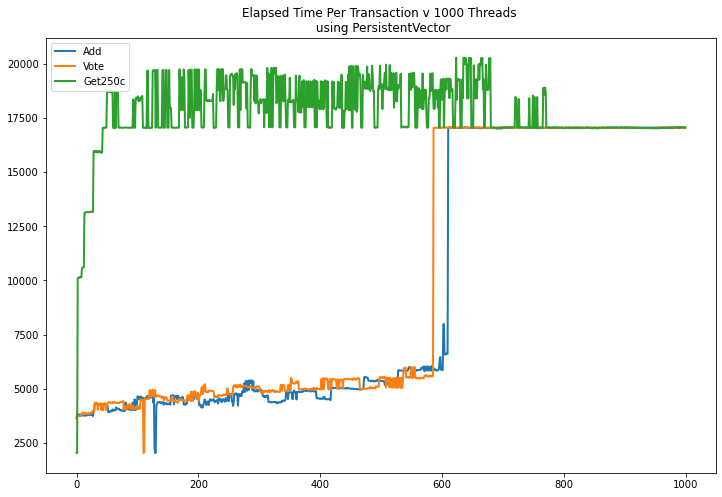

In [11]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
ax.plot(range(0,1000), add.elapsed, linewidth=2.0, label="Add")
ax.plot(range(0,1000), vote.elapsed, linewidth=2.0, label="Vote")
ax.plot(range(0,1000), get.elapsed, linewidth=2.0, label="Get250c")
ax.title.set_text('Elapsed Time Per Transaction v 1000 Threads \n using PersistentVector')
ax.legend(loc="upper left")

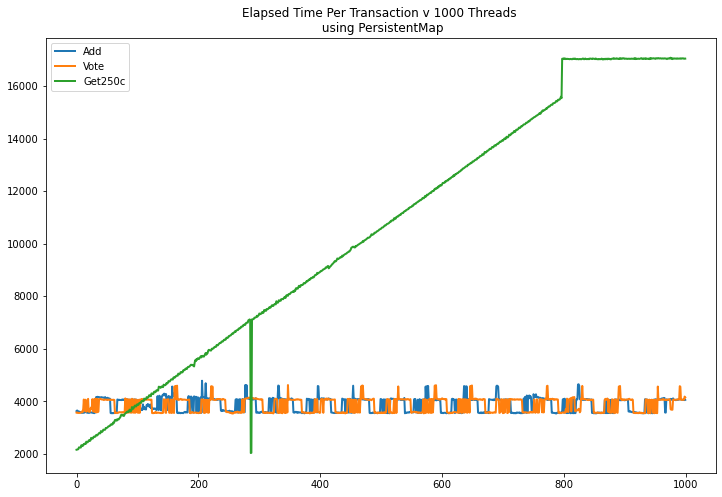

In [12]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
ax.plot(range(0,1000), add_v2.elapsed, linewidth=2.0, label="Add")
ax.plot(range(0,1000), vote_v2.elapsed, linewidth=2.0, label="Vote")
ax.plot(range(0,1000), get_v2.elapsed, linewidth=2.0, label="Get250c")
ax.title.set_text('Elapsed Time Per Transaction v 1000 Threads \n using PersistentMap')
ax.legend(loc="upper left")

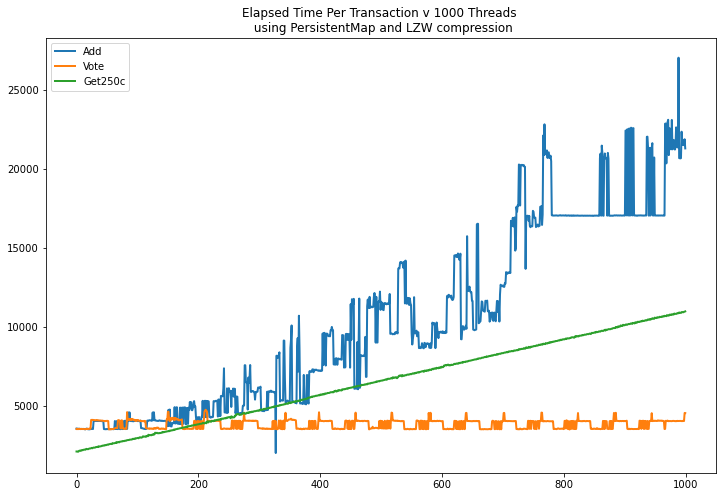

In [13]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
ax.plot(range(0,1000), add_compressed_v2.elapsed, linewidth=2.0, label="Add")
ax.plot(range(0,1000), vote_compressed_v2.elapsed, linewidth=2.0, label="Vote")
ax.plot(range(0,1000), get_compressed_v2.elapsed, linewidth=2.0, label="Get250c")
ax.title.set_text('Elapsed Time Per Transaction v 1000 Threads \n using PersistentMap and LZW compression')
ax.legend(loc="upper left")

### Throughput Per Minute over 1000 Threads
In the following section we calculate the average throughput per minute of each transaction across each the add, vote, and get function. We test the get function while retrieving 250 candidates. Throughput is calculated as (number of requests)/(total elapsed time).

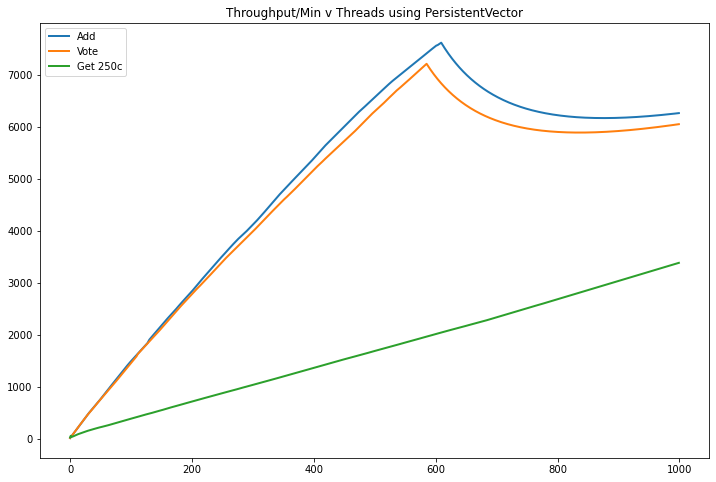

In [14]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
ax.plot(range(0,1000), add.throughput, linewidth=2.0, label="Add")
ax.plot(range(0,1000), vote.throughput, linewidth=2.0, label="Vote")
ax.plot(range(0,1000), get.throughput, linewidth=2.0, label="Get 250c")
ax.title.set_text('Throughput/Min v Threads using PersistentVector')
ax.legend(loc="upper left")

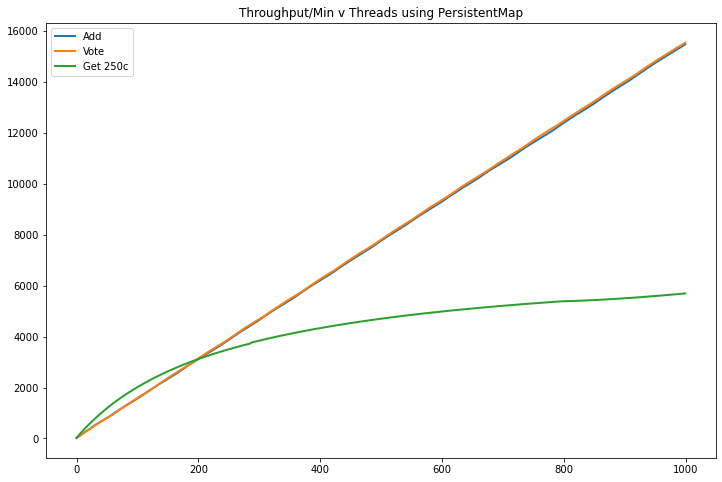

In [15]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
ax.plot(range(0,1000), add_v2.throughput, linewidth=2.0, label="Add")
ax.plot(range(0,1000), vote_v2.throughput, linewidth=2.0, label="Vote")
ax.plot(range(0,1000), get_v2.throughput, linewidth=2.0, label="Get 250c")
ax.title.set_text('Throughput/Min v Threads using PersistentMap')
ax.legend(loc="upper left")

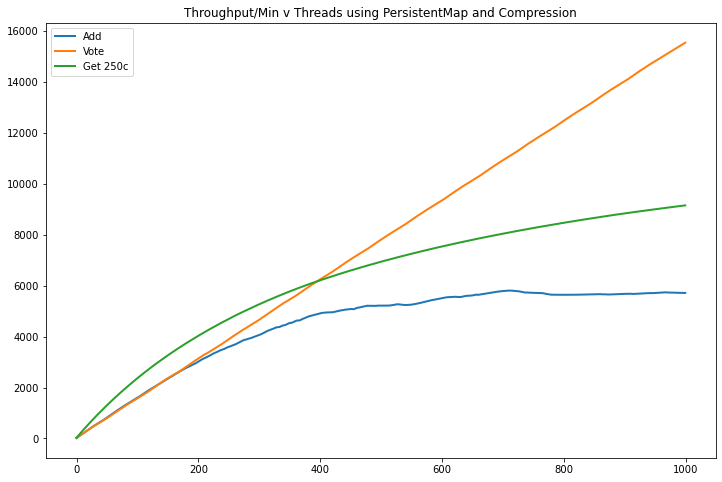

In [16]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
ax.plot(range(0,1000), add_compressed_v2.throughput, linewidth=2.0, label="Add")
ax.plot(range(0,1000), vote_compressed_v2.throughput, linewidth=2.0, label="Vote")
ax.plot(range(0,1000), get_compressed_v2.throughput, linewidth=2.0, label="Get 250c")
ax.title.set_text('Throughput/Min v Threads using PersistentMap and Compression')
ax.legend(loc="upper left")

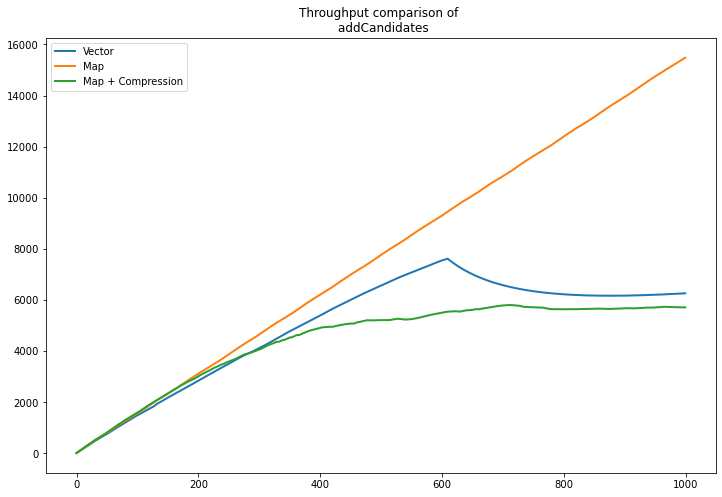

In [17]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
ax.plot(range(0,1000), add.throughput, linewidth=2.0, label="Vector")
ax.plot(range(0,1000), add_v2.throughput, linewidth=2.0, label="Map")
ax.plot(range(0,1000), add_compressed_v2.throughput, linewidth=2.0, label="Map + Compression")
ax.title.set_text('Throughput comparison of \n addCandidates')
ax.legend(loc="upper left")

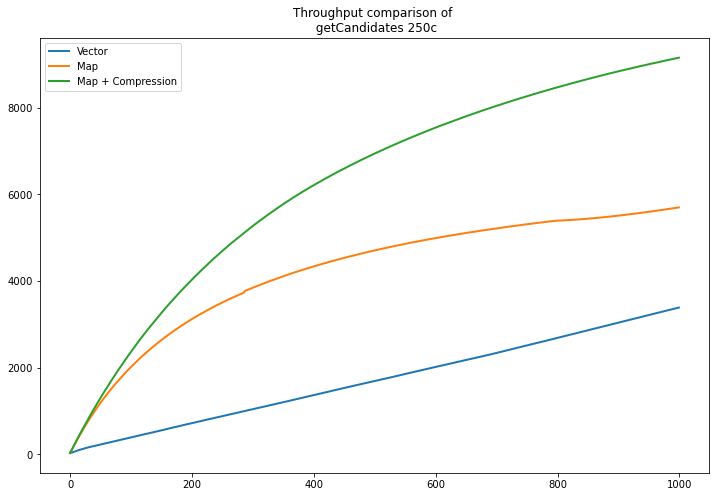

In [18]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
ax.plot(range(0,1000), get.throughput, linewidth=2.0, label="Vector")
ax.plot(range(0,1000), get_v2.throughput, linewidth=2.0, label="Map")
ax.plot(range(0,1000), get_compressed_v2.throughput, linewidth=2.0, label="Map + Compression")
ax.title.set_text('Throughput comparison of \n getCandidates 250c')
ax.legend(loc="upper left")

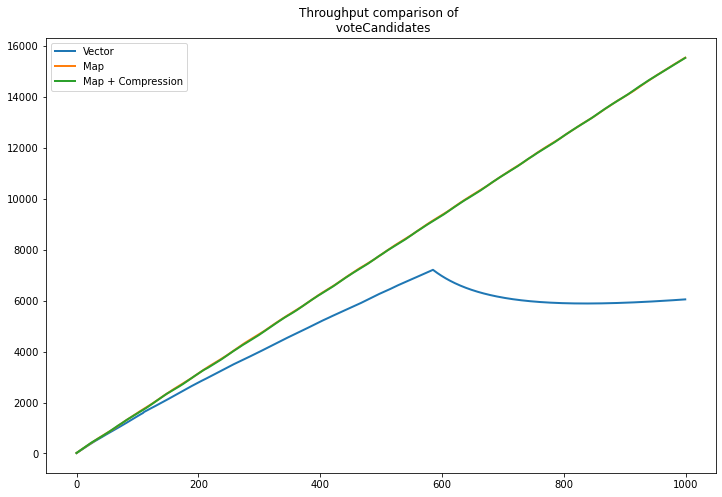

In [19]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
ax.plot(range(0,1000), vote.throughput, linewidth=2.0, label="Vector")
ax.plot(range(0,1000), vote_v2.throughput, linewidth=2.0, label="Map")
ax.plot(range(0,1000), vote_compressed_v2.throughput, linewidth=2.0, label="Map + Compression")
ax.title.set_text('Throughput comparison of \n voteCandidates')
ax.legend(loc="upper left")

In [20]:
vote_sum.at[0,"Label"]="Vector"
vote_sum_v2.at[0,"Label"]="Map"
vote_compressed_sum_v2.at[0,"Label"]="Map+Compression"

In [21]:
get_sum.at[0,"Label"]="Vector"
get_sum_v2.at[0,"Label"]="Map"
get_compressed_sum_v2.at[0,"Label"]="Map+Compression"

In [22]:
add_sum.at[0,"Label"]="Vector"
add_sum_v2.at[0,"Label"]="Map"
add_compressed_sum_v2.at[0,"Label"]="Map+Compression"

In [23]:
final_vote_sum = pd.DataFrame((vote_sum.loc[0], vote_sum_v2.loc[0], vote_compressed_sum_v2.loc[0]))

In [24]:
final_get_sum = pd.DataFrame((get_sum.loc[0], get_sum_v2.loc[0], get_compressed_sum_v2.loc[0]))

In [25]:
final_add_sum = pd.DataFrame((add_sum.loc[0], add_sum_v2.loc[0], add_compressed_sum_v2.loc[0]))

In [26]:
final_summary = pd.concat([final_vote_sum,final_get_sum,final_add_sum], ignore_index=True)

In [27]:
final_summary

,Function,Label,Std. Dev.,Error %,Throughput,Received KB/sec,Sent KB/sec,Avg. Bytes
0,vote,Vector,6007.98,41.600%,45.39265,51.74,5.82,1167.2
1,vote,Map,271.53,0.000%,70.82153,18.05,17.50,261.0
2,vote,Map+Compression,281.96,0.000%,69.28566,17.66,17.66,261.0
3,get,Vector,1585.73,49.300%,45.36793,331.93,4.74,7492.0
4,get,Map,4771.08,20.500%,37.00825,252.34,6.21,6982.1
5,get,Map+Decompression,2572.11,0.000%,47.75321,564.78,10.49,12111.0
6,add,Vector,5992.03,39.300%,45.40295,49.51,6.73,1116.7
7,add,Map,275.46,0.000%,71.35212,18.19,17.42,261.0
8,add,Map+Compression,5762.84,16.500%,33.94664,20.56,7.20,620.3


In [35]:
plt.rcParams.update({'font.size': 30})
plt.rcParams["font.family"] = "Times New Roman"

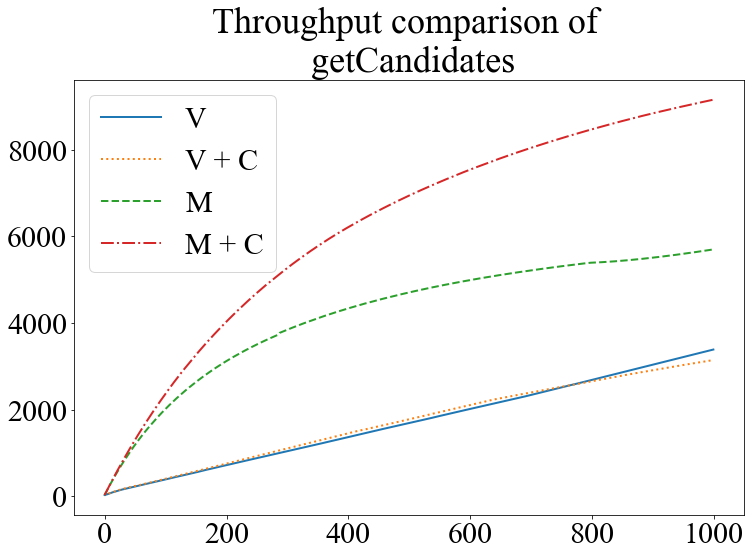

In [38]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
ax.plot(range(0,1000), get.throughput, linewidth=2.0, label="V")
ax.plot(range(0,1000), get_vector_compressed.throughput, linewidth=2.0, label="V + C", linestyle = "dotted")
ax.plot(range(0,1000), get_v2.throughput, linewidth=2.0, label="M", linestyle = "dashed")
ax.plot(range(0,1000), get_compressed_v2.throughput, linewidth=2.0, label="M + C", linestyle = "dashdot")
ax.title.set_text('Throughput comparison of \n getCandidates')
ax.legend(loc="upper left")
plt.savefig('GetCandidatesV2.png', dpi=800)

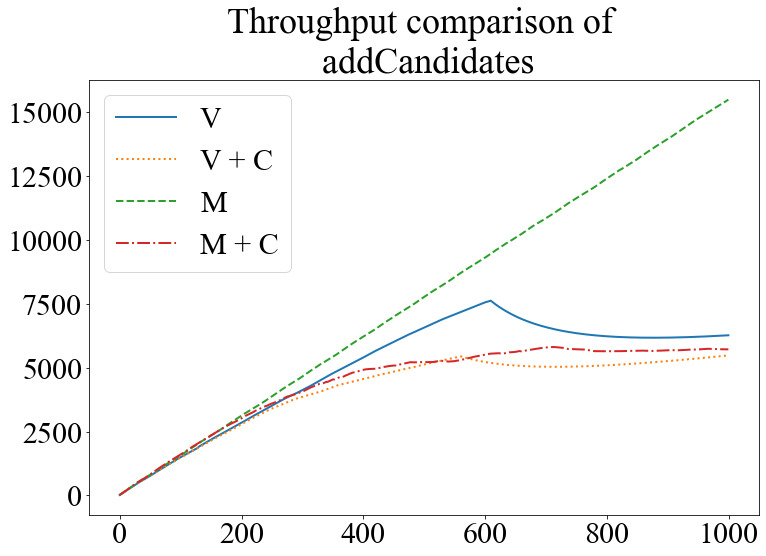

In [39]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
ax.plot(range(0,1000), add.throughput, linewidth=2.0, label="V")
ax.plot(range(0,1000), add_vector_compressed.throughput, linewidth=2.0, label="V + C", linestyle = "dotted")
ax.plot(range(0,1000), add_v2.throughput, linewidth=2.0, label="M", linestyle = "dashed")
ax.plot(range(0,1000), add_compressed_v2.throughput, linewidth=2.0, label="M + C", linestyle = "dashdot")
ax.title.set_text('Throughput comparison of \n addCandidates')
ax.legend(loc="upper left")
plt.savefig('AddCandidatesV2.png', dpi=800)